In [41]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [42]:
df = pd.read_csv('./kathmandu_house_price_dataset.csv')
df.head()

,area_sqft,num_rooms,num_bathrooms,floor_level,location_rating,price_lakh_npr
0,1926,3,2,1,5,297.64
1,1660,5,2,1,7,293.49
2,1930,2,3,3,7,317.76
3,1895,2,2,1,8,308.91
4,1844,3,1,2,6,283.03


In [43]:
X = df.drop(columns=['price_lakh_npr'])
y = df['price_lakh_npr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 458.30
R^2 Score: 0.77


In [44]:
# predicting for new data

new_data_for_prediction = [
    [1214, 3, 1, 1, 7],   # House 1
    [1805, 4, 2, 2, 9],   # House 2  
    [934, 2, 1, 1, 6],    # House 3
    [1623, 3, 2, 3, 8],   # House 4
    [1411, 3, 2, 2, 6],   # House 5
    [1118, 3, 1, 1, 5],   # House 6
    [1962, 5, 3, 2, 10],  # House 7
    [1534, 4, 2, 2, 9],   # House 8
    [1042, 2, 1, 1, 5],   # House 9
    [1875, 3, 2, 3, 8],   # House 10
    [1650, 4, 3, 1, 7],   # House 11
    [899, 2, 1, 1, 5],    # House 12
    [1238, 3, 2, 2, 6],   # House 13
    [1317, 3, 2, 1, 7],   # House 14
    [1784, 4, 3, 2, 9],   # House 15
    [1163, 2, 1, 2, 6],   # House 16
    [1372, 3, 2, 1, 8],   # House 17
    [1550, 4, 2, 3, 7],   # House 18
    [1699, 4, 2, 2, 8],   # House 19
    [1087, 2, 1, 1, 5]    # House 20
]

Actual_price =  [219.86, 295.57, 173.27, 268.11, 233.85, 194.42, 326.18, 274.63, 178.03, 292.42,277.16, 161.72, 219.64, 231.28, 306.93, 197.42, 247.13, 266.18, 281.17, 178.38]

# Use this for prediction
predictions = dt_regressor.predict(new_data_for_prediction)
print(f'Predicted Prices: {predictions}')
print(f'Actual Prices: {Actual_price}')

Predicted Prices: [247.81793103 329.72172414 217.416875   317.08416667 247.81793103
 230.85272727 366.53111111 317.08416667 204.602      329.72172414
 286.18222222 204.602      247.81793103 247.81793103 329.72172414
 247.81793103 285.94111111 270.25666667 333.0385     230.85272727]
Actual Prices: [219.86, 295.57, 173.27, 268.11, 233.85, 194.42, 326.18, 274.63, 178.03, 292.42, 277.16, 161.72, 219.64, 231.28, 306.93, 197.42, 247.13, 266.18, 281.17, 178.38]


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

predictions = dt_regressor.predict(new_data_for_prediction)
Actual_price = [219.86, 295.57, 173.27, 268.11, 233.85, 194.42, 326.18, 274.63, 178.03, 292.42,
                277.16, 161.72, 219.64, 231.28, 306.93, 197.42, 247.13, 266.18, 281.17, 178.38]


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [46]:
print("=== REGRESSION EVALUATION METRICS ===\n")

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(Actual_price, predictions)
print(f"1. Mean Absolute Error (MAE): {mae:.2f} lakh NPR")
print("   - Average absolute difference between actual and predicted prices")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(Actual_price, predictions)
print(f"\n2. Mean Squared Error (MSE): {mse:.2f}")
print("   - Average of squared differences (penalizes large errors more)")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"\n3. Root Mean Squared Error (RMSE): {rmse:.2f} lakh NPR")
print("   - Square root of MSE, same unit as target variable")

# 4. R-squared (Coefficient of Determination)
r2 = r2_score(Actual_price, predictions)
print(f"\n4. R-squared (R²): {r2:.4f}")
print(f"   - Proportion of variance explained: {r2*100:.2f}%")

# 5. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(Actual_price, predictions)
print(f"\n5. Mean Absolute Percentage Error (MAPE): {mape:.4f} ({mape*100:.2f}%)")
print("   - Average percentage error")

# 6. Custom metrics
residuals = np.array(Actual_price) - np.array(predictions)
print(f"\n6. Additional Metrics:")
print(f"   - Max Absolute Error: {np.max(np.abs(residuals)):.2f} lakh NPR")
print(f"   - Min Absolute Error: {np.min(np.abs(residuals)):.2f} lakh NPR")
print(f"   - Standard Deviation of Residuals: {np.std(residuals):.2f}")

# 7. Accuracy within tolerance
tolerance_5_percent = np.mean(np.abs(residuals) <= 0.05 * np.array(Actual_price)) * 100
tolerance_10_percent = np.mean(np.abs(residuals) <= 0.10 * np.array(Actual_price)) * 100
print(f"   - Predictions within 5% of actual: {tolerance_5_percent:.1f}%")
print(f"   - Predictions within 10% of actual: {tolerance_10_percent:.1f}%")

=== REGRESSION EVALUATION METRICS ===

1. Mean Absolute Error (MAE): 33.47 lakh NPR
   - Average absolute difference between actual and predicted prices

2. Mean Squared Error (MSE): 1317.99
   - Average of squared differences (penalizes large errors more)

3. Root Mean Squared Error (RMSE): 36.30 lakh NPR
   - Square root of MSE, same unit as target variable

4. R-squared (R²): 0.4338
   - Proportion of variance explained: 43.38%

5. Mean Absolute Percentage Error (MAPE): 0.1480 (14.80%)
   - Average percentage error

6. Additional Metrics:
   - Max Absolute Error: 52.47 lakh NPR
   - Min Absolute Error: 4.08 lakh NPR
   - Standard Deviation of Residuals: 14.07
   - Predictions within 5% of actual: 10.0%
   - Predictions within 10% of actual: 25.0%


In [48]:
print("\n=== DETAILED COMPARISON ===")
print("House | Actual | Predicted | Error | Error%")
print("-" * 45)
for i, (actual, pred) in enumerate(zip(Actual_price, predictions), 1):
    error = actual - pred
    error_pct = (abs(error) / actual) * 100
    total_errpct =+ error_pct
    print(f"{i:5d} | {actual:6.2f} | {pred:9.2f} | {error:5.2f} | {error_pct:5.1f}%")
print(f"Total Error Percentage: {total_errpct:.2f}%")


=== DETAILED COMPARISON ===
House | Actual | Predicted | Error | Error%
---------------------------------------------
    1 | 219.86 |    247.82 | -27.96 |  12.7%
    2 | 295.57 |    329.72 | -34.15 |  11.6%
    3 | 173.27 |    217.42 | -44.15 |  25.5%
    4 | 268.11 |    317.08 | -48.97 |  18.3%
    5 | 233.85 |    247.82 | -13.97 |   6.0%
    6 | 194.42 |    230.85 | -36.43 |  18.7%
    7 | 326.18 |    366.53 | -40.35 |  12.4%
    8 | 274.63 |    317.08 | -42.45 |  15.5%
    9 | 178.03 |    204.60 | -26.57 |  14.9%
   10 | 292.42 |    329.72 | -37.30 |  12.8%
   11 | 277.16 |    286.18 | -9.02 |   3.3%
   12 | 161.72 |    204.60 | -42.88 |  26.5%
   13 | 219.64 |    247.82 | -28.18 |  12.8%
   14 | 231.28 |    247.82 | -16.54 |   7.2%
   15 | 306.93 |    329.72 | -22.79 |   7.4%
   16 | 197.42 |    247.82 | -50.40 |  25.5%
   17 | 247.13 |    285.94 | -38.81 |  15.7%
   18 | 266.18 |    270.26 | -4.08 |   1.5%
   19 | 281.17 |    333.04 | -51.87 |  18.4%
   20 | 178.38 |    230.85 |

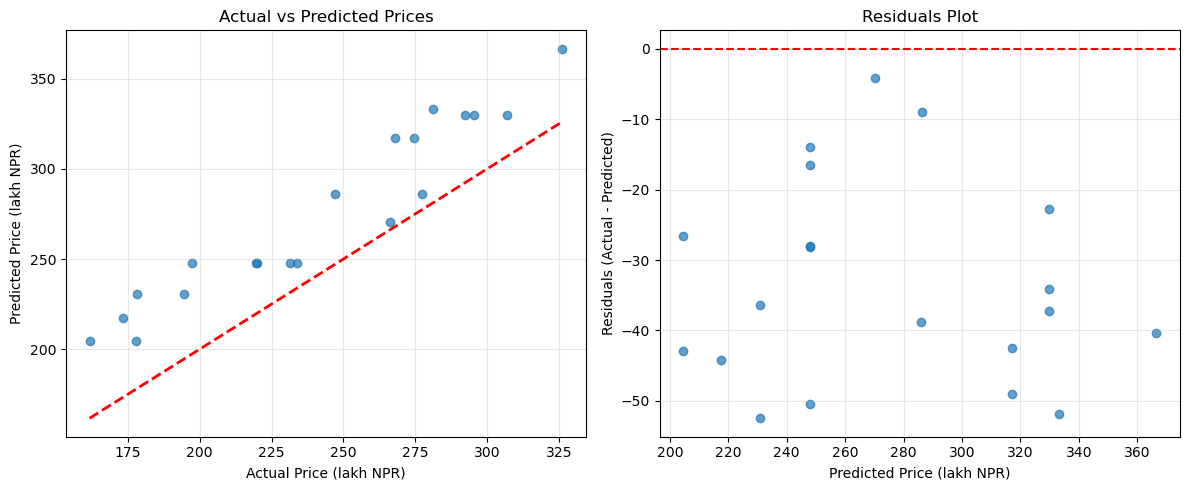

In [ ]:
# Visualization
plt.figure(figsize=(12, 5))

# Subplot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(Actual_price, predictions, alpha=0.7)
plt.plot([min(Actual_price), max(Actual_price)], [min(Actual_price), max(Actual_price)], 'r--', lw=2)
plt.xlabel('Actual Price (lakh NPR)')
plt.ylabel('Predicted Price (lakh NPR)')
plt.title('Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)

# Subplot 2: Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (lakh NPR)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print(f"\n=== INTERPRETATION ===")
print(f"• Lower MAE/RMSE = Better model")
print(f"• R² closer to 1 = Better model (yours: {r2:.3f})")
print(f"• Lower MAPE = Better model (yours: {mape*100:.1f}%)")
if r2 > 0.8:
    print(f"• Your model shows GOOD performance (R² > 0.8)")
elif r2 > 0.6:
    print(f"• Your model shows MODERATE performance (R² > 0.6)")
else:
    print(f"• Your model might need improvement (R² < 0.6)")


=== INTERPRETATION ===
• Lower MAE/RMSE = Better model
• R² closer to 1 = Better model (yours: 0.434)
• Lower MAPE = Better model (yours: 14.8%)
• Your model might need improvement (R² < 0.6)


# using bagging 
## will model performance improve ? let's see 


In [58]:
X = df.drop(columns=['price_lakh_npr'])
y = df['price_lakh_npr']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n = 100
models = []
bootstrap_X = []
bootstrap_y = []

# creating fockinggg 5 bootstrap samples
for i in range(n):
    bootstrap_indices = np.random.choice(range(len(X_train)), size=len(y_train), replace=True)
    x_boot = X_train.iloc[bootstrap_indices]
    y_boot = y_train.iloc[bootstrap_indices]

    bootstrap_X.append(x_boot)
    bootstrap_y.append(y_boot)

    #train model 
    bagging_model = DecisionTreeRegressor(max_depth=10,random_state=42)
    bagging_model.fit(x_boot, y_boot)
    models.append(bagging_model)

    # Example: test on original data and average the predictions
preds = np.zeros(len(X_test))  


for model in models:
    preds += model.predict(X_test) / len(models)  # average predictions 

        # evaluation 
    mse = mean_squared_error(y_test, preds)
    r2_bagging = r2_score(y_test, preds)

print(f"Model {i+1} - Mean Squared Error: {mse}, R^2 Score: {r2}")


print("Average prediction: ", preds.mean())


Model 100 - Mean Squared Error: 202.39123636396883, R^2 Score: 0.5024475369761663
Average prediction:  279.2089351168832


In [63]:
# predicting for new data
import matplotlib.pyplot as plt
new_data_for_prediction = [
    [1214, 3, 1, 1, 7],   # House 1
    [1805, 4, 2, 2, 9],   # House 2  
    [934, 2, 1, 1, 6],    # House 3
    [1623, 3, 2, 3, 8],   # House 4
    [1411, 3, 2, 2, 6],   # House 5
    [1118, 3, 1, 1, 5],   # House 6
    [1962, 5, 3, 2, 10],  # House 7
    [1534, 4, 2, 2, 9],   # House 8
    [1042, 2, 1, 1, 5],   # House 9
    [1875, 3, 2, 3, 8],   # House 10
    [1650, 4, 3, 1, 7],   # House 11
    [899, 2, 1, 1, 5],    # House 12
    [1238, 3, 2, 2, 6],   # House 13
    [1317, 3, 2, 1, 7],   # House 14
    [1784, 4, 3, 2, 9],   # House 15
    [1163, 2, 1, 2, 6],   # House 16
    [1372, 3, 2, 1, 8],   # House 17
    [1550, 4, 2, 3, 7],   # House 18
    [1699, 4, 2, 2, 8],   # House 19
    [1087, 2, 1, 1, 5]    # House 20
]

predictions_bagging = bagging_model.predict(new_data_for_prediction)
Actual_price_bagging = [219.86, 295.57, 173.27, 268.11, 233.85, 194.42, 326.18, 274.63, 178.03, 292.42,
                277.16, 161.72, 219.64, 231.28, 306.93, 197.42, 247.13, 266.18, 281.17, 178.38]

print("predictions: ", predictions_bagging)
print("Actual prices: ", predictions_bagging)

r2_bagging = r2_score(predictions_bagging, predictions_bagging)
print(f"R^2 Score for Bagging: {r2_bagging:.4f}")




predictions:  [233.37       334.27       233.01       284.03       261.63833333
 203.35       372.63       319.618      195.34       334.32666667
 292.158      195.34       236.61       280.3        334.27
 243.37       262.64       298.34       330.97285714 221.17      ]
Actual prices:  [233.37       334.27       233.01       284.03       261.63833333
 203.35       372.63       319.618      195.34       334.32666667
 292.158      195.34       236.61       280.3        334.27
 243.37       262.64       298.34       330.97285714 221.17      ]
R^2 Score for Bagging: 1.0000


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [64]:
print("=== REGRESSION EVALUATION METRICS ===\n")

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(Actual_price_bagging, predictions_bagging)
print(f"1. Mean Absolute Error (MAE): {mae:.2f} lakh NPR")
print("   - Average absolute difference between actual and predicted prices")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(Actual_price_bagging, predictions_bagging)
print(f"\n2. Mean Squared Error (MSE): {mse:.2f}")
print("   - Average of squared differences (penalizes large errors more)")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"\n3. Root Mean Squared Error (RMSE): {rmse:.2f} lakh NPR")
print("   - Square root of MSE, same unit as target variable")

# 4. R-squared (Coefficient of Determination)
r2 = r2_score(Actual_price_bagging, predictions_bagging)
print(f"\n4. R-squared (R²): {r2:.4f}")
print(f"   - Proportion of variance explained: {r2*100:.2f}%")

# 5. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(Actual_price_bagging, predictions_bagging)
print(f"\n5. Mean Absolute Percentage Error (MAPE): {mape:.4f} ({mape*100:.2f}%)")
print("   - Average percentage error")

# 6. Custom metrics
residuals = np.array(Actual_price_bagging) - np.array(predictions_bagging)
print(f"\n6. Additional Metrics:")
print(f"   - Max Absolute Error: {np.max(np.abs(residuals)):.2f} lakh NPR")
print(f"   - Min Absolute Error: {np.min(np.abs(residuals)):.2f} lakh NPR")
print(f"   - Standard Deviation of Residuals: {np.std(residuals):.2f}")

# 7. Accuracy within tolerance
tolerance_5_percent = np.mean(np.abs(residuals) <= 0.05 * np.array(Actual_price_bagging)) * 100
tolerance_10_percent = np.mean(np.abs(residuals) <= 0.10 * np.array(Actual_price_bagging)) * 100
print(f"   - Predictions within 5% of actual: {tolerance_5_percent:.1f}%")
print(f"   - Predictions within 10% of actual: {tolerance_10_percent:.1f}%")


=== REGRESSION EVALUATION METRICS ===

1. Mean Absolute Error (MAE): 32.17 lakh NPR
   - Average absolute difference between actual and predicted prices

2. Mean Squared Error (MSE): 1254.15
   - Average of squared differences (penalizes large errors more)

3. Root Mean Squared Error (RMSE): 35.41 lakh NPR
   - Square root of MSE, same unit as target variable

4. R-squared (R²): 0.4613
   - Proportion of variance explained: 46.13%

5. Mean Absolute Percentage Error (MAPE): 0.1391 (13.91%)
   - Average percentage error

6. Additional Metrics:
   - Max Absolute Error: 59.74 lakh NPR
   - Min Absolute Error: 8.93 lakh NPR
   - Standard Deviation of Residuals: 14.81
   - Predictions within 5% of actual: 5.0%
   - Predictions within 10% of actual: 40.0%


In [65]:
print("\n=== DETAILED COMPARISON ===")
print("House | Actual | Predicted | Error | Error%")
print("-" * 45)
for i, (actual, pred) in enumerate(zip(Actual_price_bagging, predictions_bagging), 1):
    error = actual - pred
    error_pct = (abs(error) / actual) * 100
    tot_err_pct =+ error_pct
    print(f"{i:5d} | {actual:6.2f} | {pred:9.2f} | {error:5.2f} | {error_pct:5.1f}%")
print(f"Total Error Percentage: {tot_err_pct:.2f}%")


=== DETAILED COMPARISON ===
House | Actual | Predicted | Error | Error%
---------------------------------------------
    1 | 219.86 |    233.37 | -13.51 |   6.1%
    2 | 295.57 |    334.27 | -38.70 |  13.1%
    3 | 173.27 |    233.01 | -59.74 |  34.5%
    4 | 268.11 |    284.03 | -15.92 |   5.9%
    5 | 233.85 |    261.64 | -27.79 |  11.9%
    6 | 194.42 |    203.35 | -8.93 |   4.6%
    7 | 326.18 |    372.63 | -46.45 |  14.2%
    8 | 274.63 |    319.62 | -44.99 |  16.4%
    9 | 178.03 |    195.34 | -17.31 |   9.7%
   10 | 292.42 |    334.33 | -41.91 |  14.3%
   11 | 277.16 |    292.16 | -15.00 |   5.4%
   12 | 161.72 |    195.34 | -33.62 |  20.8%
   13 | 219.64 |    236.61 | -16.97 |   7.7%
   14 | 231.28 |    280.30 | -49.02 |  21.2%
   15 | 306.93 |    334.27 | -27.34 |   8.9%
   16 | 197.42 |    243.37 | -45.95 |  23.3%
   17 | 247.13 |    262.64 | -15.51 |   6.3%
   18 | 266.18 |    298.34 | -32.16 |  12.1%
   19 | 281.17 |    330.97 | -49.80 |  17.7%
   20 | 178.38 |    221.17 

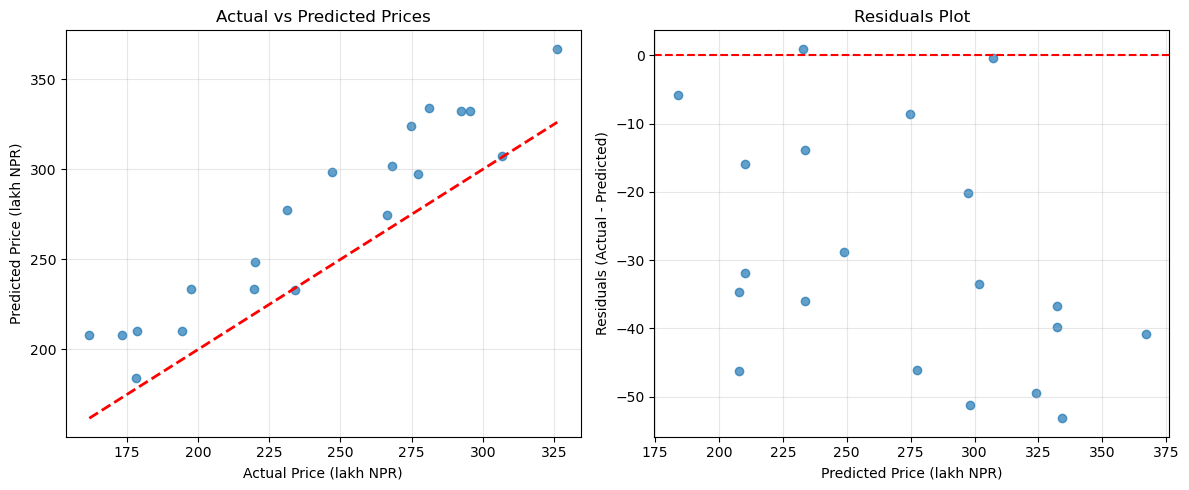

In [53]:
# Subplot 1: Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(Actual_price_bagging, predictions_bagging, alpha=0.7)
plt.plot([min(Actual_price_bagging), max(Actual_price_bagging)], [min(Actual_price_bagging), max(Actual_price_bagging)], 'r--', lw=2)
plt.xlabel('Actual Price (lakh NPR)')
plt.ylabel('Predicted Price (lakh NPR)')
plt.title('Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)

# Subplot 2: Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(predictions_bagging, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (lakh NPR)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [54]:
print(f"\n=== INTERPRETATION ===")
print(f"• Lower MAE/RMSE = Better model")
print(f"• R² closer to 1 = Better model (yours: {r2:.3f})")
print(f"• Lower MAPE = Better model (yours: {mape*100:.1f}%)")
if r2 > 0.8:
    print(f"• Your model shows GOOD performance (R² > 0.8)")
elif r2 > 0.6:
    print(f"• Your model shows MODERATE performance (R² > 0.6)")
else:
    print(f"• Your model might need improvement (R² < 0.6)")


=== INTERPRETATION ===
• Lower MAE/RMSE = Better model
• R² closer to 1 = Better model (yours: 0.502)
• Lower MAPE = Better model (yours: 12.8%)
• Your model might need improvement (R² < 0.6)


In [ ]:
# iam doing miskate 
# use more complicated dataset and experiment